# Page Rank Coin Distribution (Directed Graph)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
G=nx.DiGraph()
G.add_nodes_from([i for i in range(10)])

In [3]:
def add_edges(G,p):
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                r=random.random()
                if r<=p:
                    G.add_edge(i,j)
                else:
                    continue
    return G

C:\Users\Sachin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Sachin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


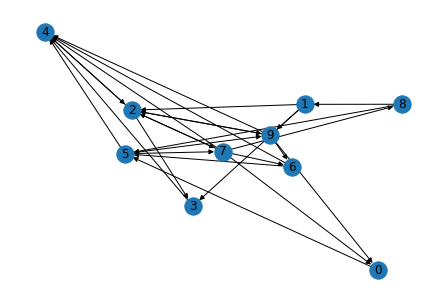

In [4]:
G=add_edges(G,0.3)
nx.draw(G,with_labels=True)
plt.show()

In [5]:
def initialize_points(G):
    points = [100 for i in range(G.number_of_nodes())]
    return points
points= initialize_points(G)

In [6]:
def distribute_points(G,points):
    prev_points=points
    new_points=[0 for i in range(G.number_of_nodes())]
    for i in G.nodes():
        out=G.out_edges(i)
        if len(out)==0:
            new_points[i]+=prev_points[i]
        else:
            share=(float)(prev_points[i])/len(out)
            for each in out:
                new_points[each[1]]+=share
    return G,new_points

In [7]:
def keep_distributing_points(G,points):
    prev_points=points
    while(1):
        G,new_points=distribute_points(G,prev_points)
        for i in range(0,len(G.nodes)):
            print(i,":",new_points[i])
        char=input()
        if char=='#':
            break
        prev_points=new_points
    return G, new_points
G,new_points=keep_distributing_points(G,points)

0 : 45.0
1 : 50.0
2 : 178.33333333333334
3 : 58.333333333333336
4 : 253.33333333333334
5 : 200.0
6 : 45.0
7 : 58.333333333333336
8 : 20.0
9 : 91.66666666666667

0 : 34.583333333333336
1 : 10.0
2 : 304.58333333333337
3 : 61.25
4 : 226.66666666666666
5 : 77.5
6 : 34.583333333333336
7 : 111.25
8 : 11.666666666666668
9 : 127.91666666666667

0 : 54.22916666666667
1 : 5.833333333333334
2 : 284.2291666666667
3 : 79.47916666666667
4 : 234.75
5 : 57.708333333333336
6 : 54.22916666666667
7 : 101.97916666666667
8 : 22.25
9 : 105.3125
#
